In [14]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut

In [101]:
tess_jd_offset = 2457000

In [2]:
pred_pos = pd.read_csv('/epyc/projects/tess/tess_ffi.dat', delim_whitespace=True)

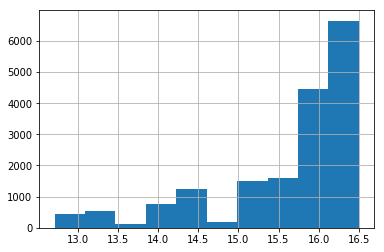

In [8]:
pred_pos.query('Vmag < 15.5')

In [142]:
# Choose an object to start with.
pred_pos.query('Vmag < 13').groupby('objId')[['objId', 'time']].count().query('time > 300')

,objId,time
objId,,
577,335,335


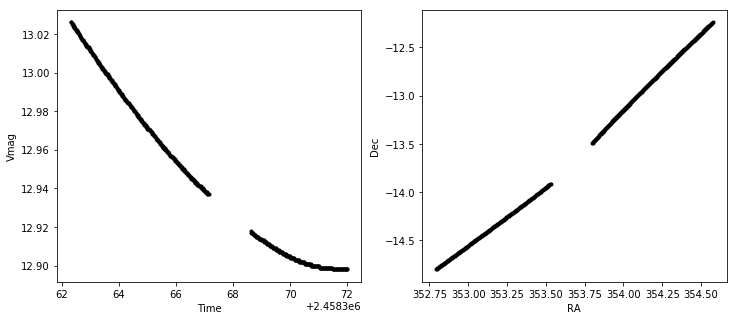

In [143]:
objId = 577
pred_i = pred_pos.query('objId == @objId')
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(pred_i.time, pred_i.Vmag, 'k.')
plt.xlabel('Time')
plt.ylabel('Vmag')
plt.subplot(1, 2, 2)
plt.plot(pred_i.ra, pred_i.dec, 'k.')
plt.xlabel('RA')
plt.ylabel('Dec')

In [149]:
# Try it for one of the times/positions.
# i == index in the observations for this object.
i = 0
pi = pred_i.iloc[i]
coord = SkyCoord(pi.ra, pi.dec, unit="deg")
print(coord)
print(Tesscut.get_sectors(coord, radius=0.2))
#print(pi)
time = pi.time
print('obj time', time, pi.Vmag)
hdulist = Tesscut.get_cutouts(coord, size=20)

<SkyCoord (ICRS): (ra, dec) in deg
    (354.5753661, -12.24023704)>
  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0002-1-3      2      1   3
obj time 2458362.3082491 13.026


In [150]:
if len(hdulist)>1:
    print('more than one sector?')

In [151]:
h = hdulist[0]
h[1].data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '400J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(20, 20)'
    name = 'FLUX'; format = '400E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(20, 20)'
    name = 'FLUX_ERR'; format = '400E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(20, 20)'
    name = 'FLUX_BKG'; format = '400E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(20, 20)'
    name = 'FLUX_BKG_ERR'; format = '400E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(20, 20)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'FFI_FILE'; format = '38A'; unit = 'pixel'
)

In [152]:
# Define a function to simplify the plotting command that we do repeatedly.
def plot_cutout(image):
    """
    Plot image and add grid lines.
    """
    plt.imshow(image, origin = 'lower', cmap = plt.cm.YlGnBu_r, 
           vmax = np.percentile(image, 92),
           vmin = np.percentile(image, 5))
    plt.grid(axis = 'both',color = 'white', ls = 'solid')
    plt.colorbar(shrink=.80)

Time of object: 2458362.3082491


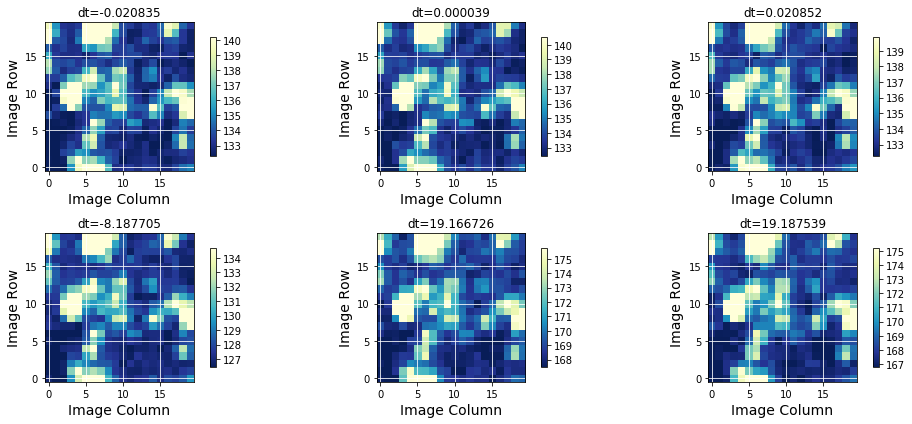

In [160]:
# okay .. so hdu[1] has time/data for ALL the FFI's in one place. 
dt = abs(hdu[1].data['TIME'] + tess_jd_offset - time)
idx = np.where(dt == dt.min())[0][0]
print('Time of object:', time)

hdu = hdulist[0]
image = hdu[1].data['FLUX']

fig = plt.figure(figsize=(14, 6))
j = 1
plt.subplot(2,3,j)
i = idx-1
plot_cutout(image[i])
plt.title('dt=%f' % (hdu[1].data['TIME'][i] + tess_jd_offset - time))
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)
j +=1
plt.subplot(2,3,j)
i = idx
plot_cutout(image[i])
plt.title('dt=%f' % (hdu[1].data['TIME'][i]+ tess_jd_offset - time))
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)
j+=1
plt.subplot(2,3,j)
i = idx+1
plot_cutout(image[i])
plt.title('dt=%f' % (hdu[1].data['TIME'][i]+ tess_jd_offset - time))
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)
j+=1
plt.subplot(2,3,j)
i = 0
plot_cutout(image[i])
plt.title('dt=%f' % (hdu[1].data['TIME'][i]+ tess_jd_offset - time))
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)
j+=1
plt.subplot(2,3,j)
i = -2
plot_cutout(image[i])
plt.title('dt=%f' % (hdu[1].data['TIME'][i]+ tess_jd_offset - time))
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)
j+=1
plt.subplot(2,3,j)
i = -1
plot_cutout(image[i])
plt.title('dt=%f' % (hdu[1].data['TIME'][i]+ tess_jd_offset - time))
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)

plt.tight_layout()
